# Lab April 4

## Overview

This lab is intended to be executed in your lab machine.

You can download this notebook by cloning this repository to somewhere on your machine

```shell
git clone https://github.com/ExgnosisClasses/Apr4Lab
```
Or you can open a browser in the VM and go the github repo and cut and paste

If you have downloaded the repo, cd to the downloaded directory.

If you care cutting and pasting from a browser in the VM, create the directory 'Apr4Lab' and cd into it

Once you are in the directory, start jupyter lab. The code below is using a directory that may not be the same as yours

```shell
C:\apr4>jupyter lab
```

Once jupyter lab is up and running, either open the prepared notebook or create a new one. We are not using virtual environments in the lab machines.



## Part 1 Make sure all the tools are installed

For this lab, we need to ensure install several libraries have been installed

1. Numpy - the numeric computation library.
2. Pandas - the dataframe library



In [ ]:
# Check for numpy
import numpy as np
print(np.__version__)

If you got an error that numpy is not found, remove the '#' in the next cell and execute it.

Then go back a rexecute the previous cell

In [ ]:
#!pip install numpy

In [ ]:
# Check for pandas
import pandas as pd
print(pd.__version__)

If pandas is not installed, you will see something like this

```text
---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
Cell In[4], line 2
      1 # Check for pandas
----> 2 import pandas as pd
      3 print(pd.__version__)

ModuleNotFoundError: No module named 'pandas'
```

If you got this error remove the '#' in the next cell and execute it.

Then go back a rexecute the previous cell


In [ ]:
#!pip install pandas


In [ ]:
# surpress deprecated warnings
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

## Step one. Create the data

This is the starting data.

1. We create the data.
2. Load it into a data frame
3. Display the data frame

In [ ]:
data = {
    'Name': ['Alice', 'BOB', 'Charlie', 'David', 'Eve', None, 'frank', 'Alice'],
    'Age': [25, 30, np.nan, 45, 'unknown', 22, 30, 25],
    'Email': ['alice@mail.com', 'BOB@EMAIL.com', None, 'david@mail.com', 'eve@mail.com',
              'eve@mail.com', 'frank@mail.com', 'alice@mail.com'],
    'SignupDate': ['2021-01-01', '2021-02-15', 'not available', '2021-03-10', '2021-02-15',
                   '2021-01-01', None, '2021-01-01'],
    'Score': ['85', 90, 88, '91', 76, 'eighty', 77, 85]
}
df = pd.DataFrame(data)
df
# df is a data frame
df = pd.DataFrame(data)
df

##  Step 2: Inspect the Data

Use some of the data visualization tools to inspect the data

In [ ]:
# View first few rows
print(df.head())

# Summary info
print("\nSummary Info")
df.info()

# Check for null values
print("\nCheck for null values by colums")
print(df.isnull().sum())

# Get column data types
print("\nData type for each column")
print(df.dtypes)

# View duplicates
print("\nDhe number of duplicates")
print(df.duplicated().sum())

# Unique values per column
print("\nThe number of unique values per colum")
df.nunique()

#### The Output
- Strings in dataframes are text objects
- But everything is a string because the data was created as a chunk of text
- This is typical of importing data from csv files, etc.
- We would like to have data in meaniful data representations like this:

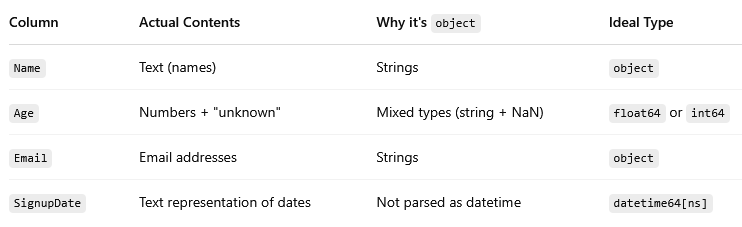

## Step 3: Handle Missing Values

`df['Name'] = df['Name'].fillna('Unknown')`
- Replaces any NaN (missing) values in the Name column with the string 'Unknown'.
- Missing names could break logic later (e.g., grouping, filtering).
- It's common to fill missing text fields with a placeholder.

`df['Email'] = df['Email'].fillna('noemail@unknown.com')`
- Fills missing values in the Email column with a default placeholder email.
- Ensures all rows have an email, even if it's fake.
- Helpful when exporting or joining with other data that requires non-null emails.

`df['SignupDate'] = df['SignupDate'].replace('not available', np.nan)`
- Finds any cells in SignupDate that literally say 'not available' and replaces them with np.nan (missing value).
- 'not available' is a placeholder string pretending to be a missing value.
- Converting it to np.nan makes it easier to handle using pandas tools (fillna(), date parsing, etc.).

In [ ]:
df['Name'] = df['Name'].fillna('Unknown')
df['Email'] = df['Email'].fillna('noemail@unknown.com')
df['SignupDate'] = df['SignupDate'].replace('not available', np.nan)


In [ ]:
# show results
df

## Step 4: Convert data types

In the examples. the `errors='coerce'` means that bad data should just be replaced with NaN instead of crashing

In [ ]:
# Convert Age column to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Convert Score to numeric
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

# Convert SignupDate to datetime
df['SignupDate'] = pd.to_datetime(df['SignupDate'], errors='coerce')

## Step 5: Fill Missing Values Intelligently

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Score'] = df['Score'].fillna(df['Score'].mean())
df['SignupDate'] = df['SignupDate'].fillna(method='bfill')  # or 'ffill'

In [ ]:
#check the data
df

## Step 6: Remove Duplicates and normalize strings

In [ ]:
df = df.drop_duplicates()

df['Name'] = df['Name'].str.title()
df['Email'] = df['Email'].str.lower()

In [ ]:
# Check the data
df

## Step 7: Feature Engineering


In [ ]:
# Add a Signup Year column:
df['SignupYear'] = df['SignupDate'].dt.year

df

In [ ]:
# Extract Email Provider:
df['EmailProvider'] = df['Email'].str.split('@').str[1]
df

In [ ]:
# Create Age Category:

def categorize_age(age):
    if age < 30:
        return 'Young'
    elif age < 45:
        return 'Middle-aged'
    else:
        return 'Senior'

df['AgeGroup'] = df['Age'].apply(categorize_age)

df

## Cleaned Data

In [ ]:
print(df.info())
print("\n---------------------------")
print(df.describe())
print("\n---------------------------")
df